In [1]:
import pandas as pd
import collections

In [2]:
df=pd.read_csv('hadithFinal.csv')
df

,sand,chapter_no,chapter,level,matn,sand_length,matn_length
0,حدثنا محمد بن سنان قال حدثنا فليح ح وحدثني إبر...,3.0,Knowledge - كتاب العلم,صعب,بينما النبي صلى الله عليه وسلم في مجلس يحدث ال...,546.0,385
1,حدثنا أبو النعمان عارم بن الفضل قال حدثنا أبو ...,3.0,Knowledge - كتاب العلم,سهل,تخلف عنا النبي صلى الله عليه وسلم في سفرة سافر...,289.0,181
2,حدثنا قتيبة حدثنا إسماعيل بن جعفر عن عبد الله ...,3.0,Knowledge - كتاب العلم,سهل,إن من الشجر شجرة لا يسقط ورقها وإنها مثل المس...,317.0,209
3,حدثنا خالد بن مخلد حدثنا سليمان حدثنا عبد الله...,3.0,Knowledge - كتاب العلم,سهل,إن من الشجر شجرة لا يسقط ورقها وإنها مثل المس...,307.0,204
4,حدثنا عبد الله بن يوسف قال حدثنا الليث عن سعيد...,3.0,Knowledge - كتاب العلم,صعب,بينما نحن جلوس مع النبي صلى الله عليه وسلم في ...,1085.0,877
...,...,...,...,...,...,...,...
2690,حدثنا مسدد حدثنا يحيى عن سعيد عن قتادة أن أنسا...,62.0,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,صعد النبي صلى الله عليه وسلم أحدا ومعه أبو بكر...,216.0,140
2691,حدثنا قتيبة حدثنا حاتم عن يزيد بن أبي عبيد عن ...,62.0,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,كان علي قد تخلف عن النبي صلى الله عليه وسلم في...,498.0,439
2692,حدثني محمد بن بشار حدثنا غندر حدثنا شعبة عن سع...,62.0,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,أما ترضى أن تكون مني بمنزلة هارون من موسى,172.0,51
2693,حدثنا علي بن الجعد أخبرنا شعبة عن أيوب عن ابن ...,62.0,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,اقضوا كما كنتم تقضون فإني أكره الاختلاف حتى يك...,232.0,140


In [3]:
# check for nan values
df.info()
df[df['sand_length'].isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2695 entries, 0 to 2694
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sand         2694 non-null   object 
 1   chapter_no   2695 non-null   float64
 2   chapter      2695 non-null   object 
 3   level        2695 non-null   object 
 4   matn         2695 non-null   object 
 5   sand_length  2694 non-null   float64
 6   matn_length  2695 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 147.5+ KB


,sand,chapter_no,chapter,level,matn,sand_length,matn_length
758,NaN,25.0,Hajj (Pilgrimage) - كتاب الحج,صعب,قدم رسول الله صلى الله عليه وسلم وأصحابه فقال ...,NaN,241


In [4]:
# drop nan values
df.drop(df.index[758], inplace = True ) # can use dropna

df.info()
df[df['sand_length'].isna()]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2694 entries, 0 to 2694
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sand         2694 non-null   object 
 1   chapter_no   2694 non-null   float64
 2   chapter      2694 non-null   object 
 3   level        2694 non-null   object 
 4   matn         2694 non-null   object 
 5   sand_length  2694 non-null   float64
 6   matn_length  2694 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 168.4+ KB


,sand,chapter_no,chapter,level,matn,sand_length,matn_length


In [5]:
# change float columns to int
df = df.astype({"chapter_no":"int","sand_length":"int","matn_length":"int"})
df

,sand,chapter_no,chapter,level,matn,sand_length,matn_length
0,حدثنا محمد بن سنان قال حدثنا فليح ح وحدثني إبر...,3,Knowledge - كتاب العلم,صعب,بينما النبي صلى الله عليه وسلم في مجلس يحدث ال...,546,385
1,حدثنا أبو النعمان عارم بن الفضل قال حدثنا أبو ...,3,Knowledge - كتاب العلم,سهل,تخلف عنا النبي صلى الله عليه وسلم في سفرة سافر...,289,181
2,حدثنا قتيبة حدثنا إسماعيل بن جعفر عن عبد الله ...,3,Knowledge - كتاب العلم,سهل,إن من الشجر شجرة لا يسقط ورقها وإنها مثل المس...,317,209
3,حدثنا خالد بن مخلد حدثنا سليمان حدثنا عبد الله...,3,Knowledge - كتاب العلم,سهل,إن من الشجر شجرة لا يسقط ورقها وإنها مثل المس...,307,204
4,حدثنا عبد الله بن يوسف قال حدثنا الليث عن سعيد...,3,Knowledge - كتاب العلم,صعب,بينما نحن جلوس مع النبي صلى الله عليه وسلم في ...,1085,877
...,...,...,...,...,...,...,...
2690,حدثنا مسدد حدثنا يحيى عن سعيد عن قتادة أن أنسا...,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,صعد النبي صلى الله عليه وسلم أحدا ومعه أبو بكر...,216,140
2691,حدثنا قتيبة حدثنا حاتم عن يزيد بن أبي عبيد عن ...,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,كان علي قد تخلف عن النبي صلى الله عليه وسلم في...,498,439
2692,حدثني محمد بن بشار حدثنا غندر حدثنا شعبة عن سع...,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,أما ترضى أن تكون مني بمنزلة هارون من موسى,172,51
2693,حدثنا علي بن الجعد أخبرنا شعبة عن أيوب عن ابن ...,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,اقضوا كما كنتم تقضون فإني أكره الاختلاف حتى يك...,232,140


## Remove Right-to-left character \u200f 
https://stackoverflow.com/questions/46897952/remove-right-to-left-character-u200f-in-python-hebrew
>The \w includes all Unicode word characters (including numbers) and \s includes all Unicode whitespace characters.

In [6]:
import re
df.matn=df.matn.apply(lambda s: re.sub('[^\w\s]', '', str(s)))
df.matn[0]

'بينما النبي صلى الله عليه وسلم في مجلس يحدث القوم جاءه أعرابي فقال متى الساعة فمضى رسول الله صلى الله عليه وسلم يحدث فقال بعض القوم سمع ما قال فكره ما قال وقال بعضهم بل لم يسمع حتى إذا قضى حديثه قال  أين أراه السائل عن الساعة  قال ها أنا يا رسول الله قال  فإذا ضيعت الأمانة فانتظر الساعة  قال كيف إضاعتها قال  إذا وسد الأمر إلى غير أهله فانتظر الساعة '

In [7]:
df['chapter'].value_counts()

Hajj (Pilgrimage) - كتاب الحج                                                        166
Prophetic Commentary on the Qur'an (Tafseer of the Prophet (pbuh)) - كتاب التفسير    127
Prayers (Salat) - كتاب الصلاة                                                        118
Merits of the Helpers in Madinah (Ansaar) - كتاب مناقب الأنصار                       100
Call to Prayers (Adhaan) - كتاب الأذان                                                97
                                                                                    ... 
Makaatib - كتاب المكاتب                                                                3
Pilgrims Prevented from Completing the Pilgrimage - كتاب المحصر                        3
Shuf'a - كتاب الشفعة                                                                   3
Hunting; Slaughtering - كتاب الذبائح والصيد                                            2
Loans; Payment of Loans; Freezing of Property; Bankruptcy - كتاب فى الاستقراض          1
Name: chapter, Length

In [8]:
df['level'].value_counts()

صعب    1401
سهل    1293
Name: level, dtype: int64

In [9]:
# list of all hadith matn
hadith=list(df["matn"])
hadith

['بينما النبي صلى الله عليه وسلم في مجلس يحدث القوم جاءه أعرابي فقال متى الساعة فمضى رسول الله صلى الله عليه وسلم يحدث فقال بعض القوم سمع ما قال فكره ما قال وقال بعضهم بل لم يسمع حتى إذا قضى حديثه قال  أين أراه السائل عن الساعة  قال ها أنا يا رسول الله قال  فإذا ضيعت الأمانة فانتظر الساعة  قال كيف إضاعتها قال  إذا وسد الأمر إلى غير أهله فانتظر الساعة ',
 'تخلف عنا النبي صلى الله عليه وسلم في سفرة سافرناها فأدركنا وقد أرهقتنا الصلاة ونحن نتوضأ فجعلنا نمسح على أرجلنا فنادى بأعلى صوته  ويل للأعقاب من النار  مرتين أو ثلاثا',
 ' إن من الشجر شجرة لا يسقط ورقها وإنها مثل المسلم فحدثوني ما هي  فوقع الناس في شجر البوادي قال عبد الله ووقع في نفسي أنها النخلة فاستحييت ثم قالوا حدثنا ما هي يا رسول الله قال  هي النخلة ',
 ' إن من الشجر شجرة لا يسقط ورقها وإنها مثل المسلم حدثوني ما هي  قال فوقع الناس في شجر البوادي قال عبد الله فوقع في نفسي أنها النخلة ثم قالوا حدثنا ما هي يا رسول الله قال  هي النخلة ',
 'بينما نحن جلوس مع النبي صلى الله عليه وسلم في المسجد دخل رجل على جمل فأناخه في المسجد ثم عقله ث

## Toknization

In [10]:
from nltk.tokenize import word_tokenize
df['tokenized_matn'] = df.apply(lambda row: word_tokenize(str(row['matn'])), axis=1)
df

,sand,chapter_no,chapter,level,matn,sand_length,matn_length,tokenized_matn
0,حدثنا محمد بن سنان قال حدثنا فليح ح وحدثني إبر...,3,Knowledge - كتاب العلم,صعب,بينما النبي صلى الله عليه وسلم في مجلس يحدث ال...,546,385,"[بينما, النبي, صلى, الله, عليه, وسلم, في, مجلس..."
1,حدثنا أبو النعمان عارم بن الفضل قال حدثنا أبو ...,3,Knowledge - كتاب العلم,سهل,تخلف عنا النبي صلى الله عليه وسلم في سفرة سافر...,289,181,"[تخلف, عنا, النبي, صلى, الله, عليه, وسلم, في, ..."
2,حدثنا قتيبة حدثنا إسماعيل بن جعفر عن عبد الله ...,3,Knowledge - كتاب العلم,سهل,إن من الشجر شجرة لا يسقط ورقها وإنها مثل المس...,317,209,"[إن, من, الشجر, شجرة, لا, يسقط, ورقها, وإنها, ..."
3,حدثنا خالد بن مخلد حدثنا سليمان حدثنا عبد الله...,3,Knowledge - كتاب العلم,سهل,إن من الشجر شجرة لا يسقط ورقها وإنها مثل المس...,307,204,"[إن, من, الشجر, شجرة, لا, يسقط, ورقها, وإنها, ..."
4,حدثنا عبد الله بن يوسف قال حدثنا الليث عن سعيد...,3,Knowledge - كتاب العلم,صعب,بينما نحن جلوس مع النبي صلى الله عليه وسلم في ...,1085,877,"[بينما, نحن, جلوس, مع, النبي, صلى, الله, عليه,..."
...,...,...,...,...,...,...,...,...
2690,حدثنا مسدد حدثنا يحيى عن سعيد عن قتادة أن أنسا...,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,صعد النبي صلى الله عليه وسلم أحدا ومعه أبو بكر...,216,140,"[صعد, النبي, صلى, الله, عليه, وسلم, أحدا, ومعه..."
2691,حدثنا قتيبة حدثنا حاتم عن يزيد بن أبي عبيد عن ...,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,كان علي قد تخلف عن النبي صلى الله عليه وسلم في...,498,439,"[كان, علي, قد, تخلف, عن, النبي, صلى, الله, علي..."
2692,حدثني محمد بن بشار حدثنا غندر حدثنا شعبة عن سع...,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,أما ترضى أن تكون مني بمنزلة هارون من موسى,172,51,"[أما, ترضى, أن, تكون, مني, بمنزلة, هارون, من, ..."
2693,حدثنا علي بن الجعد أخبرنا شعبة عن أيوب عن ابن ...,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,اقضوا كما كنتم تقضون فإني أكره الاختلاف حتى يك...,232,140,"[اقضوا, كما, كنتم, تقضون, فإني, أكره, الاختلاف..."


# Remove stop words

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import io
nltk.download('stopwords')
nltk.download('punkt')
# print(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Toka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Toka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [12]:
all_stopwords = stopwords.words('arabic')
#print(all_stopwords)
stop_word_list = ["حينما","الذي","هو","فلان","سمعت","بن","حدثنا","رضي","الله","عنه","عنهما","حتى","يقول"
                  ,"قال","قالت","بن","يحدث"
                  ,"الى","اليوم","يومنا","صلى الله عليه وسلم"
                 "إليه","وإنما","لكل","كانت","فقال","عني","وكان","لقد","عنها","وسلم","صلى","رسول","عليه "
                "حديث","وقد","ولقد","رضى","بنت","ابن","اسمع","عم","النبى","يأتيك","أبا","أحيانا","قلت","قط", "وحدثنا", "حدثني" ,"أنه" ,"أخبرنا" ,"أخبرني"
                  ,"إني"]
#----------------------------------------------------------------------------------------------------
# the all stopword list that has stop word extend the new one which has the additional word
all_stopwords.extend(stop_word_list)
all_stopwords


['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [13]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in all_stopwords]
    return output


#applying the function
df['no_stopwords']= df['tokenized_matn'].apply(lambda x:remove_stopwords(x))
df

,sand,chapter_no,chapter,level,matn,sand_length,matn_length,tokenized_matn,no_stopwords
0,حدثنا محمد بن سنان قال حدثنا فليح ح وحدثني إبر...,3,Knowledge - كتاب العلم,صعب,بينما النبي صلى الله عليه وسلم في مجلس يحدث ال...,546,385,"[بينما, النبي, صلى, الله, عليه, وسلم, في, مجلس...","[بينما, النبي, مجلس, القوم, جاءه, أعرابي, السا..."
1,حدثنا أبو النعمان عارم بن الفضل قال حدثنا أبو ...,3,Knowledge - كتاب العلم,سهل,تخلف عنا النبي صلى الله عليه وسلم في سفرة سافر...,289,181,"[تخلف, عنا, النبي, صلى, الله, عليه, وسلم, في, ...","[تخلف, عنا, النبي, سفرة, سافرناها, فأدركنا, أر..."
2,حدثنا قتيبة حدثنا إسماعيل بن جعفر عن عبد الله ...,3,Knowledge - كتاب العلم,سهل,إن من الشجر شجرة لا يسقط ورقها وإنها مثل المس...,317,209,"[إن, من, الشجر, شجرة, لا, يسقط, ورقها, وإنها, ...","[الشجر, شجرة, يسقط, ورقها, وإنها, المسلم, فحدث..."
3,حدثنا خالد بن مخلد حدثنا سليمان حدثنا عبد الله...,3,Knowledge - كتاب العلم,سهل,إن من الشجر شجرة لا يسقط ورقها وإنها مثل المس...,307,204,"[إن, من, الشجر, شجرة, لا, يسقط, ورقها, وإنها, ...","[الشجر, شجرة, يسقط, ورقها, وإنها, المسلم, حدثو..."
4,حدثنا عبد الله بن يوسف قال حدثنا الليث عن سعيد...,3,Knowledge - كتاب العلم,صعب,بينما نحن جلوس مع النبي صلى الله عليه وسلم في ...,1085,877,"[بينما, نحن, جلوس, مع, النبي, صلى, الله, عليه,...","[بينما, جلوس, النبي, المسجد, دخل, رجل, جمل, فأ..."
...,...,...,...,...,...,...,...,...,...
2690,حدثنا مسدد حدثنا يحيى عن سعيد عن قتادة أن أنسا...,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,صعد النبي صلى الله عليه وسلم أحدا ومعه أبو بكر...,216,140,"[صعد, النبي, صلى, الله, عليه, وسلم, أحدا, ومعه...","[صعد, النبي, أحدا, ومعه, بكر, وعمر, وعثمان, فر..."
2691,حدثنا قتيبة حدثنا حاتم عن يزيد بن أبي عبيد عن ...,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,كان علي قد تخلف عن النبي صلى الله عليه وسلم في...,498,439,"[كان, علي, قد, تخلف, عن, النبي, صلى, الله, علي...","[علي, تخلف, النبي, خيبر, رمد, أتخلف, فخرج, علي..."
2692,حدثني محمد بن بشار حدثنا غندر حدثنا شعبة عن سع...,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,أما ترضى أن تكون مني بمنزلة هارون من موسى,172,51,"[أما, ترضى, أن, تكون, مني, بمنزلة, هارون, من, ...","[ترضى, تكون, مني, بمنزلة, هارون, موسى]"
2693,حدثنا علي بن الجعد أخبرنا شعبة عن أيوب عن ابن ...,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,اقضوا كما كنتم تقضون فإني أكره الاختلاف حتى يك...,232,140,"[اقضوا, كما, كنتم, تقضون, فإني, أكره, الاختلاف...","[اقضوا, كنتم, تقضون, فإني, أكره, الاختلاف, يكو..."


In [14]:
df.dtypes

sand              object
chapter_no         int32
chapter           object
level             object
matn              object
sand_length        int32
matn_length        int32
tokenized_matn    object
no_stopwords      object
dtype: object

In [15]:
df.columns

Index(['sand', 'chapter_no', 'chapter', 'level', 'matn', 'sand_length',
       'matn_length', 'tokenized_matn', 'no_stopwords'],
      dtype='object')

## Stemming


In [16]:
#importing the Stemming function from nltk library
import nltk
from nltk.stem.isri import ISRIStemmer
#defining the object for stemming
st = ISRIStemmer()

In [17]:
#defining a function for stemming
def stemming(text):
    stem_text = [st.stem(word) for word in text]
    return stem_text
df['matn_stemmed']=df['no_stopwords'].apply(lambda x: stemming(x))

# df= df[['matn_stemmed','no_stopwords','chapter_num']]
df

,sand,chapter_no,chapter,level,matn,sand_length,matn_length,tokenized_matn,no_stopwords,matn_stemmed
0,حدثنا محمد بن سنان قال حدثنا فليح ح وحدثني إبر...,3,Knowledge - كتاب العلم,صعب,بينما النبي صلى الله عليه وسلم في مجلس يحدث ال...,546,385,"[بينما, النبي, صلى, الله, عليه, وسلم, في, مجلس...","[بينما, النبي, مجلس, القوم, جاءه, أعرابي, السا...","[بين, نبي, جلس, قوم, جءه, عرب, سعة, مضى, قوم, ..."
1,حدثنا أبو النعمان عارم بن الفضل قال حدثنا أبو ...,3,Knowledge - كتاب العلم,سهل,تخلف عنا النبي صلى الله عليه وسلم في سفرة سافر...,289,181,"[تخلف, عنا, النبي, صلى, الله, عليه, وسلم, في, ...","[تخلف, عنا, النبي, سفرة, سافرناها, فأدركنا, أر...","[خلف, عنا, نبي, سفر, سفر, أدر, رهق, صلة, ونح, ..."
2,حدثنا قتيبة حدثنا إسماعيل بن جعفر عن عبد الله ...,3,Knowledge - كتاب العلم,سهل,إن من الشجر شجرة لا يسقط ورقها وإنها مثل المس...,317,209,"[إن, من, الشجر, شجرة, لا, يسقط, ورقها, وإنها, ...","[الشجر, شجرة, يسقط, ورقها, وإنها, المسلم, فحدث...","[شجر, شجر, سقط, ورق, وإن, سلم, حدثو, وقع, ناس,..."
3,حدثنا خالد بن مخلد حدثنا سليمان حدثنا عبد الله...,3,Knowledge - كتاب العلم,سهل,إن من الشجر شجرة لا يسقط ورقها وإنها مثل المس...,307,204,"[إن, من, الشجر, شجرة, لا, يسقط, ورقها, وإنها, ...","[الشجر, شجرة, يسقط, ورقها, وإنها, المسلم, حدثو...","[شجر, شجر, سقط, ورق, وإن, سلم, حدثو, وقع, ناس,..."
4,حدثنا عبد الله بن يوسف قال حدثنا الليث عن سعيد...,3,Knowledge - كتاب العلم,صعب,بينما نحن جلوس مع النبي صلى الله عليه وسلم في ...,1085,877,"[بينما, نحن, جلوس, مع, النبي, صلى, الله, عليه,...","[بينما, جلوس, النبي, المسجد, دخل, رجل, جمل, فأ...","[بين, جلس, نبي, سجد, دخل, رجل, جمل, أنخ, سجد, ..."
...,...,...,...,...,...,...,...,...,...,...
2690,حدثنا مسدد حدثنا يحيى عن سعيد عن قتادة أن أنسا...,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,صعد النبي صلى الله عليه وسلم أحدا ومعه أبو بكر...,216,140,"[صعد, النبي, صلى, الله, عليه, وسلم, أحدا, ومعه...","[صعد, النبي, أحدا, ومعه, بكر, وعمر, وعثمان, فر...","[صعد, نبي, احد, ومع, بكر, عمر, عثم, رجف, وقل, ..."
2691,حدثنا قتيبة حدثنا حاتم عن يزيد بن أبي عبيد عن ...,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,كان علي قد تخلف عن النبي صلى الله عليه وسلم في...,498,439,"[كان, علي, قد, تخلف, عن, النبي, صلى, الله, علي...","[علي, تخلف, النبي, خيبر, رمد, أتخلف, فخرج, علي...","[علي, خلف, نبي, خيبر, رمد, خلف, خرج, علي, لحق,..."
2692,حدثني محمد بن بشار حدثنا غندر حدثنا شعبة عن سع...,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,أما ترضى أن تكون مني بمنزلة هارون من موسى,172,51,"[أما, ترضى, أن, تكون, مني, بمنزلة, هارون, من, ...","[ترضى, تكون, مني, بمنزلة, هارون, موسى]","[رضى, تكون, مني, نزل, هار, وسى]"
2693,حدثنا علي بن الجعد أخبرنا شعبة عن أيوب عن ابن ...,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل,اقضوا كما كنتم تقضون فإني أكره الاختلاف حتى يك...,232,140,"[اقضوا, كما, كنتم, تقضون, فإني, أكره, الاختلاف...","[اقضوا, كنتم, تقضون, فإني, أكره, الاختلاف, يكو...","[اقض, كنتم, تقض, فإن, اكر, خلف, يكون, ناس, جمع..."


# final matn

In [18]:
def finalpreprocess(string):
    return stemming(remove_stopwords(word_tokenize(string)))

df['clean_text'] = df['matn'].apply(lambda x: finalpreprocess(x))
df['Final_matn'] = df['clean_text'].apply(lambda x: ' '.join(x))



In [19]:
df['Final_matn'] = df['matn_stemmed'].apply(lambda x: ' '.join(x))

df=df[['Final_matn','matn_length','chapter_no','chapter','level']]

df.to_csv('final_processed_df.csv')

In [20]:
df

,Final_matn,matn_length,chapter_no,chapter,level
0,بين نبي جلس قوم جءه عرب سعة مضى قوم سمع فكر وق...,385,3,Knowledge - كتاب العلم,صعب
1,خلف عنا نبي سفر سفر أدر رهق صلة ونح وضأ جعل مس...,181,3,Knowledge - كتاب العلم,سهل
2,شجر شجر سقط ورق وإن سلم حدثو وقع ناس شجر بدي ع...,209,3,Knowledge - كتاب العلم,سهل
3,شجر شجر سقط ورق وإن سلم حدثو وقع ناس شجر بدي ع...,204,3,Knowledge - كتاب العلم,سهل
4,بين جلس نبي سجد دخل رجل جمل أنخ سجد عقل يكم حم...,877,3,Knowledge - كتاب العلم,صعب
...,...,...,...,...,...
2690,صعد نبي احد ومع بكر عمر عثم رجف وقل اسك اظن ضر...,140,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل
2691,علي خلف نبي خيبر رمد خلف خرج علي لحق نبي فلم ل...,439,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل
2692,رضى تكون مني نزل هار وسى,51,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل
2693,اقض كنتم تقض فإن اكر خلف يكون ناس جمع امت مات ...,140,62,Companions of the Prophet - كتاب فضائل أصحاب ا...,سهل


## Model 

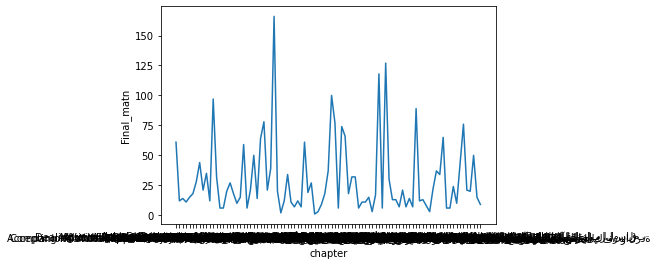

In [25]:
import seaborn as sns
matnByTopic=df.groupby(by="chapter").count()["Final_matn"]
# matnByTopic=df.groupby(by="chapter").count()["level"]

sns.lineplot(x=matnByTopic.index,y=matnByTopic);


## Real Model


In [26]:
x= df['Final_matn']
y = df['level']

x.shape

(2694,)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer , TfidfTransformer
from sklearn.model_selection import train_test_split


# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score
# import numpy as np
# from sklearn.metrics import classification_report


In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec

# Only transform x_test (not fit and transform)
X_test_tfidf = tfidf_vectorizer.transform(list(X_test)) #Don't fit() your TfidfVectorizer to your test data


In [31]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x.values.astype('U'))

In [32]:
df_test=pd.read_excel('test_hadeth.xlsx')  #reading the data
df_test['clean_text'] = df_test['final_matn'].apply(lambda x: ' '.join(finalpreprocess(x)))
X_test=df_test['clean_text'] 
df_test
X_vector=tfidf_vectorizer.transform(X_test) #converting X_test to vector

In [36]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
# from sklearn.model_selection import cross_val_score
import numpy as np


def testModel(model,X,y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    model.fit(X_train_tfidf,y_train)
    modelName = type(model).__name__
    pred=model.predict(X_test_tfidf)
    print("modelName", modelName)
    print(classification_report(y_test,pred))
    tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
    print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)
    
    score=np.mean(cross_val_score(model, X, y, cv=5))

    print("--------------------------------------------")
    
    
    
 #Testing on new dataset with the best model
    df_test=pd.read_excel('test_hadeth.xlsx')  #reading the data
    df_test['clean_text'] = df_test['final_matn'].apply(lambda x: ' '.join(finalpreprocess(x)))
    X_test=df_test['clean_text'] 
    X_vector=tfidf_vectorizer.transform(X_test) #converting X_test to vector
    y_predict = model.predict(X_vector)      #use the trained model on X_vector
    df_test['target']= y_predict
    df_test.drop('clean_text', inplace=True, axis=1)
    df_test.to_csv('submission.csv')
    print(classification_report(df_test['level'] ,df_test['target']))
    

    return model,{"model":modelName,"score":score}, df_test.head(67)

In [37]:
from sklearn.linear_model import SGDClassifier
testModel( SGDClassifier(loss='hinge', 
                      alpha=1e-5, 
                      max_iter=15, 
                      verbose=False),X,y)


C:\Users\Toka\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Toka\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Toka\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Toka\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Toka\anaconda3\lib\site-packages\sklearn\linear_model\_

modelName SGDClassifier
              precision    recall  f1-score   support

         سهل       0.75      0.75      0.75       135
         صعب       0.75      0.76      0.75       135

    accuracy                           0.75       270
   macro avg       0.75      0.75      0.75       270
weighted avg       0.75      0.75      0.75       270

True negatives:  101 
False positives:  34 
False negatives:  33 
True Positives:  102
--------------------------------------------
              precision    recall  f1-score   support

         سهل       0.90      0.70      0.79        50
         صعب       0.48      0.78      0.60        18

    accuracy                           0.72        68
   macro avg       0.69      0.74      0.69        68
weighted avg       0.79      0.72      0.74        68



(SGDClassifier(alpha=1e-05, max_iter=15, verbose=False),
 {'model': 'SGDClassifier', 'score': 0.6763412901490437},
                                            final_matn level target
 0   إنّمَا الأَعْمَالُ بالنِّيّاتِ، وَإِنَّمَا لِك...   سهل    سهل
 1   لا هِجْرَةَ بَعْدَ الفَتْحِ، وَلَكِنْ جِهَادٌ ...   سهل    سهل
 2   رَجَعْنَا مِنْ غَزْوَةِ تَبُوكَ مَعَ النَّبيِّ...   سهل    صعب
 3   إنَّ الله لا ينْظُرُ إِلى أجْسَامِكُمْ، ولا إِ...   سهل    سهل
 4   سُئِلَ رسولُ الله - صلى الله عليه وسلم - عَنِ ...   سهل    سهل
 ..                                                ...   ...    ...
 62  "‏ أن الأمانة نزلت من السماء في جذر قلوب الرجا...   سهل    سهل
 63  "‏ كل أمتي يدخلون الجنة، إلا من أبى ‏"‏‏.‏ قال...   سهل    سهل
 64  ‏ فقالوا إن لصاحبكم هذا مثلا فاضربوا له مثلا‏....   صعب    صعب
 65  "يا معشر القراء استقيموا فقد سبقتم سبقا بعيدا ...   سهل    صعب
 66  "‏ إنما مثلي ومثل ما بعثني الله به كمثل رجل أت...   صعب    صعب
 
 [67 rows x 3 columns])

In [38]:
from sklearn.linear_model import LogisticRegression
testModel(LogisticRegression(),X,y)


modelName LogisticRegression
              precision    recall  f1-score   support

         سهل       0.75      0.76      0.76       135
         صعب       0.76      0.75      0.75       135

    accuracy                           0.76       270
   macro avg       0.76      0.76      0.76       270
weighted avg       0.76      0.76      0.76       270

True negatives:  103 
False positives:  32 
False negatives:  34 
True Positives:  101
--------------------------------------------
              precision    recall  f1-score   support

         سهل       0.88      0.74      0.80        50
         صعب       0.50      0.72      0.59        18

    accuracy                           0.74        68
   macro avg       0.69      0.73      0.70        68
weighted avg       0.78      0.74      0.75        68



(LogisticRegression(),
 {'model': 'LogisticRegression', 'score': 0.6860018897724686},
                                            final_matn level target
 0   إنّمَا الأَعْمَالُ بالنِّيّاتِ، وَإِنَّمَا لِك...   سهل    سهل
 1   لا هِجْرَةَ بَعْدَ الفَتْحِ، وَلَكِنْ جِهَادٌ ...   سهل    سهل
 2   رَجَعْنَا مِنْ غَزْوَةِ تَبُوكَ مَعَ النَّبيِّ...   سهل    صعب
 3   إنَّ الله لا ينْظُرُ إِلى أجْسَامِكُمْ، ولا إِ...   سهل    سهل
 4   سُئِلَ رسولُ الله - صلى الله عليه وسلم - عَنِ ...   سهل    سهل
 ..                                                ...   ...    ...
 62  "‏ أن الأمانة نزلت من السماء في جذر قلوب الرجا...   سهل    سهل
 63  "‏ كل أمتي يدخلون الجنة، إلا من أبى ‏"‏‏.‏ قال...   سهل    سهل
 64  ‏ فقالوا إن لصاحبكم هذا مثلا فاضربوا له مثلا‏....   صعب    صعب
 65  "يا معشر القراء استقيموا فقد سبقتم سبقا بعيدا ...   سهل    سهل
 66  "‏ إنما مثلي ومثل ما بعثني الله به كمثل رجل أت...   صعب    صعب
 
 [67 rows x 3 columns])

In [39]:
from sklearn.tree import DecisionTreeClassifier
testModel(DecisionTreeClassifier(),X,y)



modelName DecisionTreeClassifier
              precision    recall  f1-score   support

         سهل       0.70      0.71      0.70       135
         صعب       0.70      0.69      0.70       135

    accuracy                           0.70       270
   macro avg       0.70      0.70      0.70       270
weighted avg       0.70      0.70      0.70       270

True negatives:  96 
False positives:  39 
False negatives:  42 
True Positives:  93
--------------------------------------------
              precision    recall  f1-score   support

         سهل       0.85      0.66      0.74        50
         صعب       0.41      0.67      0.51        18

    accuracy                           0.66        68
   macro avg       0.63      0.66      0.63        68
weighted avg       0.73      0.66      0.68        68



(DecisionTreeClassifier(),
 {'model': 'DecisionTreeClassifier', 'score': 0.6755984854232332},
                                            final_matn level target
 0   إنّمَا الأَعْمَالُ بالنِّيّاتِ، وَإِنَّمَا لِك...   سهل    سهل
 1   لا هِجْرَةَ بَعْدَ الفَتْحِ، وَلَكِنْ جِهَادٌ ...   سهل    سهل
 2   رَجَعْنَا مِنْ غَزْوَةِ تَبُوكَ مَعَ النَّبيِّ...   سهل    سهل
 3   إنَّ الله لا ينْظُرُ إِلى أجْسَامِكُمْ، ولا إِ...   سهل    سهل
 4   سُئِلَ رسولُ الله - صلى الله عليه وسلم - عَنِ ...   سهل    سهل
 ..                                                ...   ...    ...
 62  "‏ أن الأمانة نزلت من السماء في جذر قلوب الرجا...   سهل    صعب
 63  "‏ كل أمتي يدخلون الجنة، إلا من أبى ‏"‏‏.‏ قال...   سهل    سهل
 64  ‏ فقالوا إن لصاحبكم هذا مثلا فاضربوا له مثلا‏....   صعب    سهل
 65  "يا معشر القراء استقيموا فقد سبقتم سبقا بعيدا ...   سهل    صعب
 66  "‏ إنما مثلي ومثل ما بعثني الله به كمثل رجل أت...   صعب    صعب
 
 [67 rows x 3 columns])

In [40]:
from sklearn.svm import SVC
testModel(SVC(verbose=True),X,y)


[LibSVM]modelName SVC
              precision    recall  f1-score   support

         سهل       0.74      0.78      0.76       135
         صعب       0.77      0.73      0.75       135

    accuracy                           0.75       270
   macro avg       0.75      0.75      0.75       270
weighted avg       0.75      0.75      0.75       270

True negatives:  105 
False positives:  30 
False negatives:  37 
True Positives:  98
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]--------------------------------------------
              precision    recall  f1-score   support

         سهل       0.90      0.76      0.83        50
         صعب       0.54      0.78      0.64        18

    accuracy                           0.76        68
   macro avg       0.72      0.77      0.73        68
weighted avg       0.81      0.76      0.78        68



(SVC(verbose=True),
 {'model': 'SVC', 'score': 0.6937975460545827},
                                            final_matn level target
 0   إنّمَا الأَعْمَالُ بالنِّيّاتِ، وَإِنَّمَا لِك...   سهل    سهل
 1   لا هِجْرَةَ بَعْدَ الفَتْحِ، وَلَكِنْ جِهَادٌ ...   سهل    سهل
 2   رَجَعْنَا مِنْ غَزْوَةِ تَبُوكَ مَعَ النَّبيِّ...   سهل    صعب
 3   إنَّ الله لا ينْظُرُ إِلى أجْسَامِكُمْ، ولا إِ...   سهل    سهل
 4   سُئِلَ رسولُ الله - صلى الله عليه وسلم - عَنِ ...   سهل    سهل
 ..                                                ...   ...    ...
 62  "‏ أن الأمانة نزلت من السماء في جذر قلوب الرجا...   سهل    سهل
 63  "‏ كل أمتي يدخلون الجنة، إلا من أبى ‏"‏‏.‏ قال...   سهل    سهل
 64  ‏ فقالوا إن لصاحبكم هذا مثلا فاضربوا له مثلا‏....   صعب    صعب
 65  "يا معشر القراء استقيموا فقد سبقتم سبقا بعيدا ...   سهل    سهل
 66  "‏ إنما مثلي ومثل ما بعثني الله به كمثل رجل أت...   صعب    صعب
 
 [67 rows x 3 columns])

very useful links:
    https://github.com/vijayaiitk/NLP-text-classification-model/blob/main/NLP%20text%20classification%20model%20Github.ipynb
    https://github.com/kavgan/nlp-in-practice/blob/master/tfidftransformer/TFIDFTransformer%20vs.%20TFIDFVectorizer.ipynb